# Simple Linear Regression in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's grab some data. Ths is from an annual happiness study of various countries. The Happiness Score is a measure of overall happiness (higher is better).  

In [2]:
happy=pd.read_csv('Happy2019.csv')

In [3]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Some of the columns have names that are awkward to work with and retype:

In [4]:
happy.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Let's make a few changes.

In [5]:
happy.columns=['Rank', 'Country', 'Score', 'GDPpc',
       'SocialSup', 'LifeExp',
       'Freedom', 'Generosity',
       'Corruption']

In [6]:
happy.head()

,Rank,Country,Score,GDPpc,SocialSup,LifeExp,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Claim: A country is happier (on average) when it's wealthier as measured by per capita GDP. What does the data say?

This is a claim that the variables $X=$GDPpc and $Y=$Score are correlated-- i.e., tend to move together (in a linear way). How do we measure and think about correlation?

What we're really saying is that for each observational unit (a Country), measured along both variables: Happiness and GDPpc, if the GDP is higher (above the mean of GDP), then happiness should be higher (above the mean of Happiness).

In [7]:
# Correlation has two factors move together; rate is between 0 and 1
# This case is not perfect but this is positive correlation between happiness score and GDP
happy[['Score','GDPpc']].corr()

,Score,GDPpc
Score,1.000000,0.793883
GDPpc,0.793883,1.000000


Variables can be negatively correlated as well. For example, the price of a new car is usually lower when the mileage is higher. Here's data for price and mileage of used Porsches.

In [8]:
porsche=pd.read_csv('PorschePrice.csv')

In [9]:
porsche.head()

,Price,Age,Mileage
0,69.4,3,21.5
1,56.9,3,43.0
2,49.9,2,19.9
3,47.4,4,36.0
4,42.9,4,44.0


In [10]:
# The more mileage on a car, the less its value/price becomes
# The older a car gets, the less its value/price becomes
# The older a car gets, the more certain it becomes there is more mileage on car, vice versa
porsche.corr()

,Price,Age,Mileage
Price,1.000000,-0.781890,-0.891348
Age,-0.781890,1.000000,0.863131
Mileage,-0.891348,0.863131,1.000000


So Price is negatively correlated with both Age and Mileage, though the correlation is stronger with Mileage, and Age and Mileage are positively correlated. 

Let's quickly recall the definition of correlation for a set of data with an $x$ and a $y$ component:

$$
\text {data: } \left\{(x_1,y_1),(x_2,y_2),\ldots, (x_n,y_n)\right\}.
$$

So each point is a country (or a car), $x$ is the GDPpc (or mileage) and $y$ is the happiness score (or price).

$$
r=Cor(X,Y)=\frac{\sum((x_i-\overline{x})(y_i-\overline{y})}{\sqrt{(x_i-\overline{x})^2}\sqrt{(y_i-\overline{y})^2}}
$$

$r$ is a number between $-1$ and $1$ and measures the strength of the *linear* correlation between $X$ and $Y$. 1 or $-1$ represent perfect linear correlation, while 0 means no correlation. If $r=0$ for variables $x$ and $y$, it means that knowing the value of $X$ does not update my guess for $Y$ (I'd just guess the mean).

If we think there's a linear relationship between $X$ and $Y$ (in the population) we can build a linear model of that relationship (using our data).

Assume: The true population relationship between $X$ and $Y$ is linear (mileage/price or GDPpc/Score):
$$
Y=\beta_0 +\beta_1X
$$

or maybe more realistically,
$$
Y\approx \beta_0+\beta_1X,
$$
so that 
$$
Y=\beta_0+\beta_1X+\epsilon,
$$
where $\epsilon$ is the error. 

Our job is to estimate the parameters $\beta_0$ and $\beta_1$ from the data. Of course, the first question is: Does the relationship seem linear?

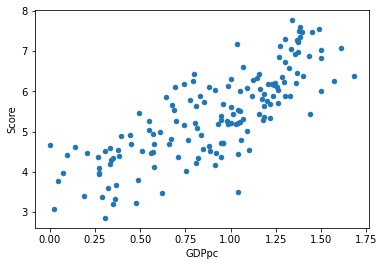

In [11]:
# If a solid line is drawn with this data set, there will be a positive slope
# Thus, there will be positive variance between happiness score and GDP, as calculated.
happy.plot.scatter(x='GDPpc',y='Score')

In [12]:
happy.shape

(156, 9)

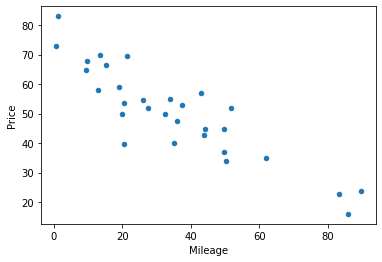

In [13]:
porsche.plot.scatter(x='Mileage',y='Price')
# Here exists negative correlation between car price and car mileage

In both cases a linear model seems reasonable.

## Fitting a linear model

1. Draw a line through the data.
2. Compute the vertical distance from each point to the line.
3. Sum the squares of these distances: Call it $RSS$.
3. Wiggle the line until the $RSS$ is as small as possible.

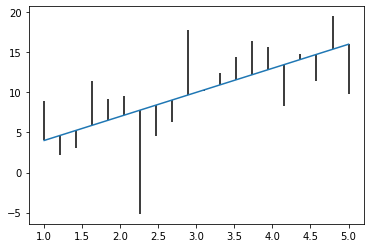

In [14]:
x = np.linspace(1,5,20)
y = 3*x+1
dy = (np.random.normal(0,4,20))
fig, ax = plt.subplots()
ax.plot(x,y)
#ax.scatter(x,y+dy)
ax.vlines(x,y,y-dy)
plt.show()

The line that minimizes the residual sum of squares ($RSS$) is the best fit line in the sense of least squares.
The parameters of the best fit line are written $\hat{\beta}_0$ and $\hat{\beta}_1$, and the model is:
$$
\hat{y}=\hat{\beta}_0+\hat{\beta}_1x.
$$
The hat means the fitted value or prediction from the model. So, the $RSS$ is:
$$
RSS= \sum_x (\hat{y}-y)^2 = \sum_x (\hat{\beta}_0+\hat{\beta}_1x-y)^2.
$$
We find values $\beta$ that minimize $RSS$.

Let's fit a few linear models. 

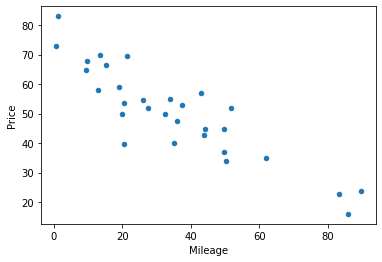

In [15]:
porsche.plot.scatter(x='Mileage',y='Price')

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

First we import the ```statsmodels``` package which is convenient for linear models. We also import the ```formula.api``` as ```ols```, which stands for ordinary least squares. The ```formula.api``` makes specifying the form of the model particularly nice. (If you've used ```R``` this will look very familiar.)

In [17]:
# Ordinary Least Squares (OLS)
mod = ols(formula='Price ~ Mileage', data=porsche)

Let's consider the code here. The model is defined by ```ols(formula='Price ~ Mileage', data=porsche)```

The dependent variable (or $Y$) appears on the left. It has to be a column from your data frame, in this case ```Price```. The ```~``` tells us that we are writing $Y$ as a function of the variables that come next. Since we're doing simple ```ols``` with only one independent predictor variable (or $X$), the next variable ```Mileage``` completes the model specification. Finally, we point ```Python``` to the data frame we're using.

We haven't actually done anything yet except specify the form for our model and the variales and data we will use. Next, we fit the model (find the $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimize $RSS$) and look at the output.

In [18]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     108.3
Date:                Thu, 06 May 2021   Prob (F-statistic):           3.98e-11
Time:                        09:58:41   Log-Likelihood:                -100.63
No. Observations:                  30   AIC:                             205.3
Df Residuals:                      28   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0905      2.370     29.998      0.000      66.236      75.945
Mileage       -0.5894      0.057    -10.405      0.000      -0.705      -0.473
==============================================================================
Omnibus:                        1.943   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                0.860
Skew:                          -0.332   Prob(JB):                        0.651
Kurtosis:                       3.496   Cond. No.                         75.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most important parts are the slope and intercept (they determine the model). They are stored in ```params```.

In [19]:
res.params

Intercept    71.090453
Mileage      -0.589401
dtype: float64

In [20]:
res.params[0]

71.09045272638988

In [21]:
res.params[1]

-0.5894009403746018

Now it's time for us to asses the accuracy of our model. Along those lines, it might first help to get a visual of how well the line we found actually fits the data. The model we found is in the middle table of the output. Here, we see that $\hat{\beta}_0=71.09$ and $\hat{\beta}_1=-0.59$. Thus, 
$$
\text{Price} = 71.09-0.59\cdot(\text{Mileage}).
$$
We can plot the line along with the data in matplotlib but the seaborn package is especially nice for making this easy.

In [22]:
import seaborn as sn

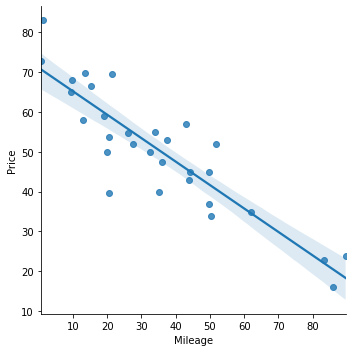

In [23]:
sn.lmplot(x='Mileage',y='Price',data=porsche)

The shaded area around the line represents a $95\%$ confidence interval on the regression line. More on that soon.

The meaning of this model is the following. For a (used) Porsche with 0 miles, the $y$-intercept $\hat{\beta}_0$ is the predicted price of $\$71,090$  The slope $\hat{\beta}_1$ indicates that for every unit increase in mileage (1000 miles) we expect the price to drop by $\$ 590$.

What does the model predict for a used Porsche with 40000 miles on it?

In [24]:
res.params[0]+res.params[1]*(40)

47.51441511140581

$\$47,514$. Let's see if that's reasonable:

In [25]:
porsche[(porsche['Mileage']>35)&(porsche['Mileage']<45)]

,Price,Age,Mileage
1,56.9,3,43.0
3,47.4,4,36.0
4,42.9,4,44.0
20,44.9,4,44.1
29,52.9,3,37.4


The model seems like a good fit. One quantification of that is the ```R-squared``` value in the table. The ```R-squared``` for this model is 0.795. The meaning of this value is...

In [26]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     108.3
Date:                Thu, 06 May 2021   Prob (F-statistic):           3.98e-11
Time:                        09:58:51   Log-Likelihood:                -100.63
No. Observations:                  30   AIC:                             205.3
Df Residuals:                      28   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.0905      2.370     29.998      0.000      66.236      75.945
Mileage       -0.5894      0.057    -10.405      0.000      -0.705      -0.473
==============================================================================
Omnibus:                        1.943   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                0.860
Skew:                          -0.332   Prob(JB):                        0.651
Kurtosis:                       3.496   Cond. No.                         75.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The percentage of the total variation in Price that is explained by Mileage. 

That is... when looking at the prices of used porsches we see condiserable variation around the mean. But some of that variation is understandable... in fact, some of that variation is explained by the correlation of price and mileage. I expect some cars to be more expensive than average because they have lower than average mileage. The $R^2$ value tells us exactly what percentage of the variation in price is explained by mileage. By the way, a model with an $R^2$ or 0.795 is excellent. We **know** that there are other factors that affect price besides mileage.

$$R^2=\frac{TSS-RSS}{TSS}$$

One other thing. For simple linear regression $R^2$ is closely related to the linear correlation we looked at earlier.

In [27]:
porsche[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.891348
Price,-0.891348,1.000000


In [28]:
(-0.891348)**2

0.7945012571040001

There are a few other things to look at in the table 

<img src="table.png">

The regression output includes some statistical hypothesis testing and confidence intervals. The most important test is on the slope of the regression line. In particular, the model output includes a test of the null hypothesis that there is *no relationship between $x$ and $y$ in the populaiton*. It's worth thinking about what no relation would look like.

In [29]:
a=np.random.normal(0,1,1000)
b=np.random.normal(0,1,1000)
null=pd.DataFrame({"a":a,"b":b})

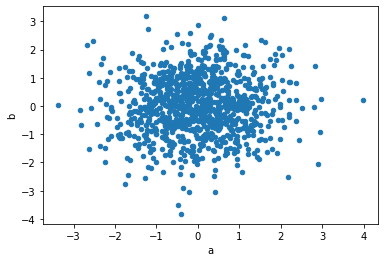

In [30]:
null.plot.scatter(x='a',y='b')

Exactly. Knowing $x$ tells us nothing about $y$. There is no correlation. If I were to try to build a model here, the slope of the line would be 0. Just guess the mean of $y$ no matter the value of $x$. 

The table gives the result of the test of the null hypothesis that there is no relation between Price and Mileage, against the alternative that there is. Mathematically:
$$
H_0: \beta_1 = 0 \\
H_a: \beta_1 \ne 0
$$

The test tells us that the probability of getting data like ours, if there were in fact no relation, is effectively 0. The value of the associated $t$-statistic is -10.405 (remember that roughly only 2.5\% of the data lives below -2).

The table also gives the standard error and a 95\% confidence interval for the slope. The standard error is the standard deviation of the distribution of slopes from samples of size 30. It measures how much we'd expect, on average, the slope to vary from one sample to another. The 95\% confidence interval give us a range of plausible values for the slope, such that we'd expect the interval to include the true slope in the population with 95\% probability. That range of values here is $\left[-.705,-.473\right]$.

Note: CI $\approx \hat{\beta}_1\pm 2\cdot SE_{\hat{\beta}_1}$, and $t=\frac{\hat{\beta}_1}{SE_{\hat{\beta}_1}}$. The standard error is the standard deviation of the distribution of slopes of samples of this size repeatedly taken from the population.

**CAVEAT**: These tests and confidence intervals are valid only when certain assumptions about the data are true. More on that later.  

One last word on the shaded region around the line in the plot in seaborn:

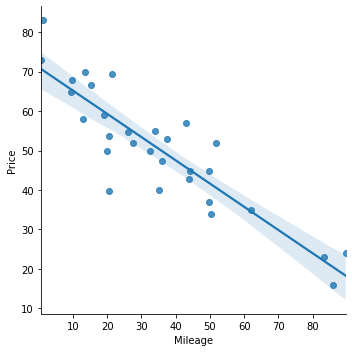

In [31]:
sn.lmplot(x='Mileage',y='Price',data=porsche)

These are bootstrap confidence intervals around the line. Note that they get wider as we move to the edges of the plot. If you wiggle a line it moves more at the ends than in the middle. 

## See variability in models with a true underlying linear relationship 

In [32]:
x=np.linspace(0,5,50)
arr=np.empty([50,10])
for j in range(10):
    for i in range(50):
        arr[i,j]=1+3*x[i]+np.random.normal(0,3)

In [33]:
df=pd.DataFrame(arr)

In [34]:
df.columns=["A","B","C","D","E","F","G","H","I","J"]

In [35]:
df.head()

,A,B,C,D,E,F,G,H,I,J
0,6.610930,-1.198393,-0.413759,1.179252,3.899676,-3.901144,4.527854,-2.826500,1.716150,1.730275
1,1.526796,3.464947,-0.607944,3.698309,7.420632,2.076974,-2.060516,2.565983,-1.459692,2.092491
2,-0.134879,5.642885,-0.462797,1.291876,-1.833929,2.122054,-2.684761,2.274949,-0.701918,1.693637
3,7.312749,2.934957,-0.760824,5.762772,3.064521,1.700126,4.679509,-0.975900,4.921730,8.921209
4,3.155375,5.154720,6.282306,3.471178,0.761454,3.200109,6.322569,-1.117905,1.480188,5.981038


In [36]:
dfm=df.melt()
dfm.head()

,variable,value
0,A,6.610930
1,A,1.526796
2,A,-0.134879
3,A,7.312749
4,A,3.155375


In [37]:
dfm.head(30)

,variable,value
0,A,6.610930
1,A,1.526796
2,A,-0.134879
3,A,7.312749
4,A,3.155375
5,A,1.411964
6,A,-1.567754
7,A,1.230219
8,A,9.771825
9,A,1.569522


In [38]:
x=list(np.linspace(1,5,50))*10
dfm['x']=x

In [39]:
dfm['x']=x

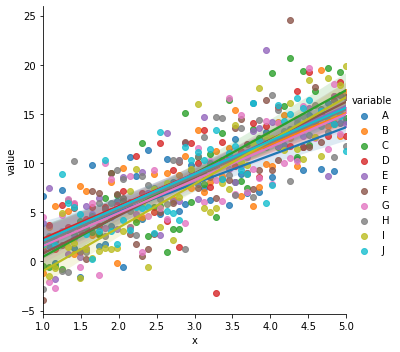

In [40]:
sn.lmplot(x='x', y='value', hue='variable', data=dfm)

In [41]:
df['x']=np.linspace(0,5,50)

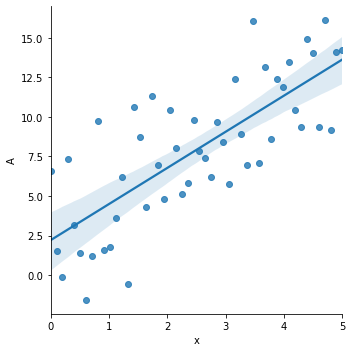

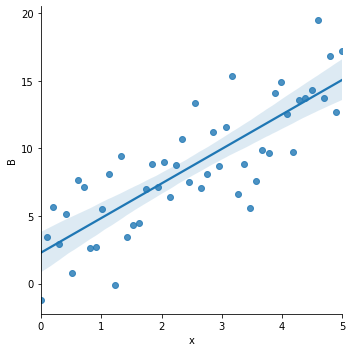

In [42]:
sn.lmplot(x='x',y='A',data=df)
sn.lmplot(x='x',y='B',data=df)

## Happiness Score data

In [43]:
mod = ols(formula='Score ~ GDPpc', data=happy)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Thu, 06 May 2021   Prob (F-statistic):           4.32e-35
Time:                        09:59:02   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3993      0.135     25.120      0.000       3.132       3.667
GDPpc          2.2181      0.137     16.202      0.000       1.948       2.489
==============================================================================
Omnibus:                        1.139   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.244
Skew:                          -0.177   Prob(JB):                        0.537
Kurtosis:                       2.742   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

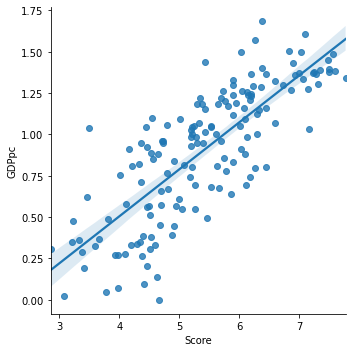

In [44]:
sn.lmplot(x='Score',y='GDPpc',data=happy)

In [45]:
happy.head()

,Rank,Country,Score,GDPpc,SocialSup,LifeExp,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


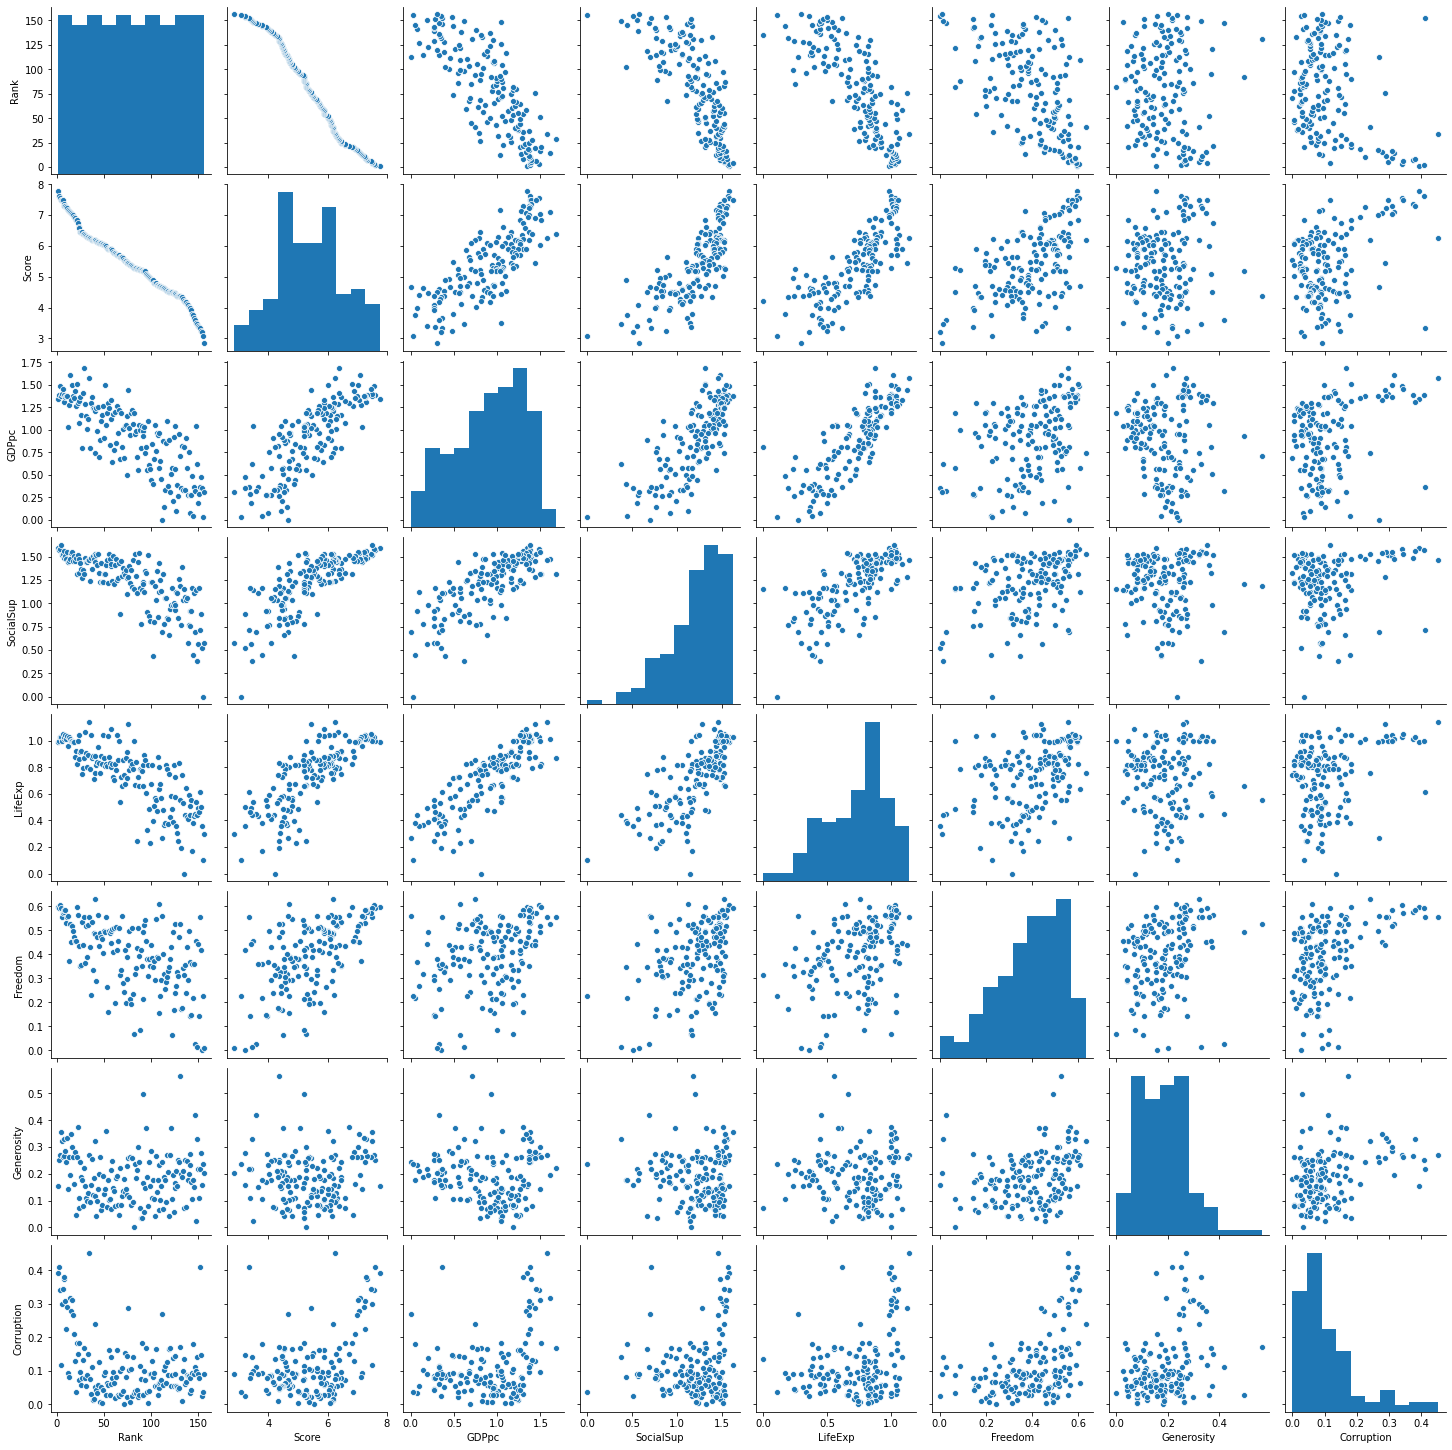

In [46]:
sn.pairplot(happy)

In [47]:
mod = ols(formula='Score ~ Freedom', data=happy)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     72.87
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.24e-14
Time:                        09:59:24   Log-Likelihood:                -207.35
No. Observations:                 156   AIC:                             418.7
Df Residuals:                     154   BIC:                             424.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6788      0.215     17.075      0.000       3.253       4.104
Freedom        4.4026      0.516      8.536      0.000       3.384       5.421
==============================================================================
Omnibus:                        4.022   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                4.082
Skew:                          -0.383   Prob(JB):                        0.130
Kurtosis:                       2.798   Cond. No.                         8.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

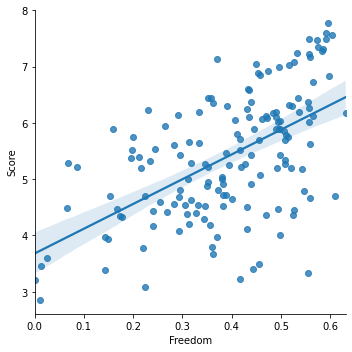

In [62]:
sn.lmplot(x='Freedom',y='Score',data=happy)

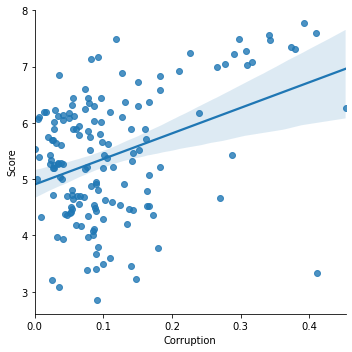

In [63]:
sn.lmplot(x='Corruption',y='Score',data=happy)

In [64]:
mod = ols(formula='Score ~ Freedom', data=happy)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     72.87
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.24e-14
Time:                        11:39:10   Log-Likelihood:                -207.35
No. Observations:                 156   AIC:                             418.7
Df Residuals:                     154   BIC:                             424.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6788      0.215     17.075      0.000       3.253       4.104
Freedom        4.4026      0.516      8.536      0.000       3.384       5.421
==============================================================================
Omnibus:                        4.022   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                4.082
Skew:                          -0.383   Prob(JB):                        0.130
Kurtosis:                       2.798   Cond. No.                         8.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear correlation is not the same as correlation

In [48]:
x=list(np.linspace(-2,2,100))
y=[num**2 for num in x]
df=pd.DataFrame({"x":x,"y":y})

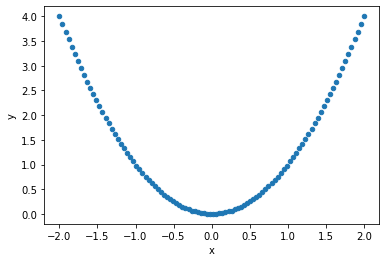

In [52]:
# Zero linear correlation between x,y in this case.
df.plot.scatter(x='x',y='y')

In [50]:
df.corr()

,x,y
x,1.000000e+00,2.629253e-16
y,2.629253e-16,1.000000e+00


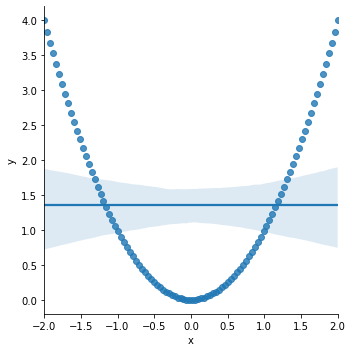

In [53]:
# Can there be a linear relationship between x and y even though it's not always the case?
sn.lmplot(x='x',y='y',data=df)

# TV Life

In [54]:
life=pd.read_csv('Televisions.csv')
life=life.dropna()

In [55]:
life.head()

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4.0,370.0,74.0,67.0
1,Bangladesh,53.5,315.0,6166.0,53.0,54.0
2,Brazil,65.0,4.0,684.0,68.0,62.0
3,Canada,76.5,1.7,449.0,80.0,73.0
4,China,70.0,8.0,643.0,72.0,68.0


In [56]:
life.columns=['Country', 'LifeExp', 'PperTV',
       'PperPhys', 'FemaleLifeE',
       'MaleLifeE']

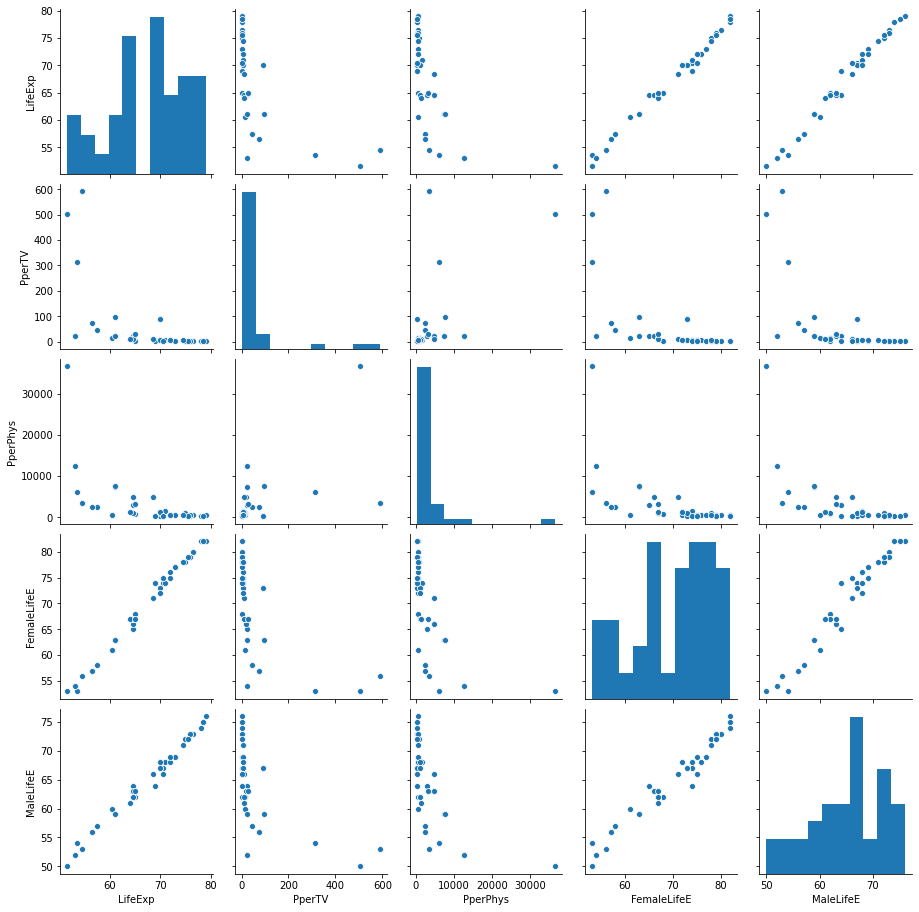

In [57]:
sn.pairplot(life)

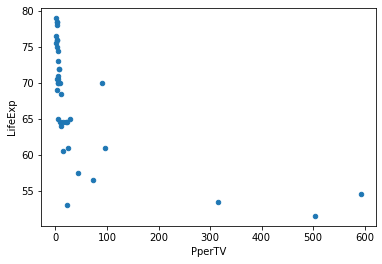

In [59]:
# Higher life expectancy in areas with less people per TV
# Is all the data here controlled?
life.plot.scatter(x='PperTV',y='LifeExp')

No hope for a linear model!?

In [60]:
life['logPperTV']=np.log(life['PperTV'])
life['logLifeExp']=np.log(life['LifeExp'])

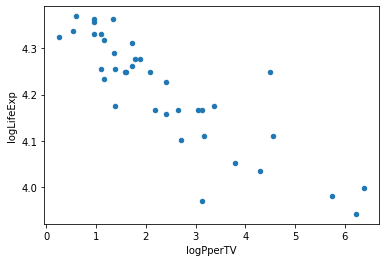

In [61]:
life.plot.scatter(x='logPperTV',y='logLifeExp')
# This model is not quite linear but might show what could be negative correlation

In [77]:
mod = ols(formula='logLifeExp ~ logPperTV', data=life)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logLifeExp   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     103.5
Date:                Tue, 04 May 2021   Prob (F-statistic):           3.91e-12
Time:                        12:32:44   Log-Likelihood:                 52.990
No. Observations:                  38   AIC:                            -102.0
Df Residuals:                      36   BIC:                            -98.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3657      0.018    237.994      0.000       4.328       4.403
logPperTV     -0.0658      0.006    -10.174      0.000      -0.079      -0.053
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                8.850
Skew:                          -0.236   Prob(JB):                       0.0120
Kurtosis:                       5.317   Cond. No.                         5.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

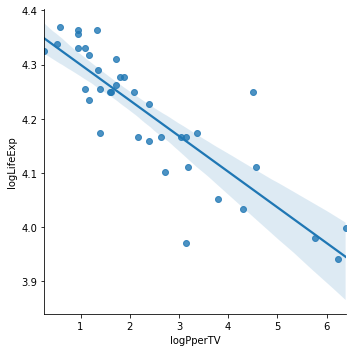

In [62]:
sn.lmplot(x='logPperTV',y='logLifeExp',data=life)

# Simulated examples

In [63]:
dom=np.random.uniform(0,10,100)
quad= [(x-2)**2+np.random.normal(0,5) for x in dom]
tightlin = [1+3*x+np.random.normal(0,1) for x in dom]
looselin = [1+3*x+np.random.normal(0,7) for x in dom]
lrdemo=pd.DataFrame(
    {'Input':dom,
    'Quad': quad,
     'Tlin': tightlin,
     'Llin': looselin
    })

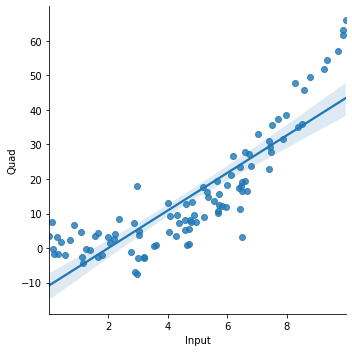

In [65]:
# There is a positive slope as calculated but no correlation
sn.lmplot(x='Input',y='Quad',data=lrdemo)

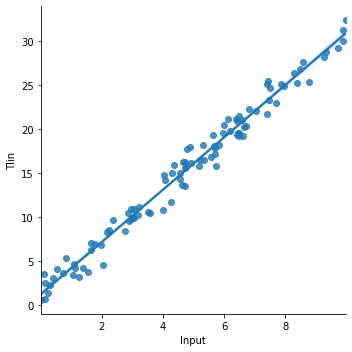

In [66]:
# Almost all data fits on trend line; thus, there is positive correlation
sn.lmplot(x='Input',y='Tlin',data=lrdemo)

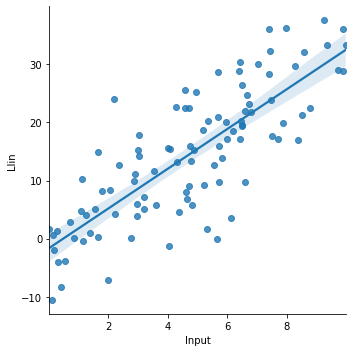

In [67]:
# Loose line has noise added and is preferred for a curved line, not simple linear trend.
# This is a complicated model with this given data set. 
# This is an example of an over-fitting model
sn.lmplot(x='Input',y='Llin',data=lrdemo)

In [70]:
mod = ols(formula='Llin ~ Input', data=lrdemo)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Llin   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     179.0
Date:                Thu, 06 May 2021   Prob (F-statistic):           7.75e-24
Time:                        10:29:25   Log-Likelihood:                -332.49
No. Observations:                 100   AIC:                             669.0
Df Residuals:                      98   BIC:                             674.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6843      1.390     -1.212      0.228      -4.442       1.073
Input          3.4277      0.256     13.378      0.000       2.919       3.936
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.269
Skew:                          -0.126   Prob(JB):                        0.874
Kurtosis:                       2.970   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$y=b_0 + b_1x$

In [73]:
b0=res.params[0] # y-intercept
b1=res.params[1] # slope

print(b0, b1)

-1.6843266190117765 3.427682997513104


In [74]:
mod = ols(formula='Tlin ~ Input', data=lrdemo)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Tlin   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     4782.
Date:                Thu, 06 May 2021   Prob (F-statistic):           5.57e-85
Time:                        10:34:31   Log-Likelihood:                -154.40
No. Observations:                 100   AIC:                             312.8
Df Residuals:                      98   BIC:                             318.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1570      0.234      4.941      0.000       0.692       1.622
Input          2.9856      0.043     69.154      0.000       2.900       3.071
==============================================================================
Omnibus:                        1.660   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.429
Skew:                          -0.140   Prob(JB):                        0.489
Kurtosis:                       2.485   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
mod = ols(formula='Quad ~ Input', data=lrdemo)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Quad   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     279.1
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.97e-30
Time:                        10:34:31   Log-Likelihood:                -356.53
No. Observations:                 100   AIC:                             717.1
Df Residuals:                      98   BIC:                             722.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8784      1.767     -6.155      0.000     -14.386      -7.371
Input          5.4436      0.326     16.705      0.000       4.797       6.090
==============================================================================
Omnibus:                        3.242   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.244
Skew:                           0.421   Prob(JB):                        0.198
Kurtosis:                       2.738   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# WinPct and Points

In [80]:
bb=pd.read_csv('cbb11to20WithUCSchools.csv')
bb.head()

,Unnamed: 0,3P,3PA,3PPct,AST,BLK,Date,FG,FGA,FGPct,...,OppTRB,PF,Result,STL,Season,TOV,TRB,Team,TmPts,loc
0,0,5.0,21.0,0.238,10.0,5.0,2010-11-16,22.0,54.0,0.407,...,31.0,18.0,L,4.0,2011,13.0,34.0,arizona-state,62.0,@
1,1,3.0,17.0,0.176,18.0,6.0,2010-11-20,28.0,61.0,0.459,...,32.0,13.0,W,4.0,2011,8.0,25.0,arizona-state,69.0,NaN
2,2,6.0,27.0,0.222,19.0,7.0,2010-11-25,28.0,64.0,0.438,...,23.0,16.0,W,9.0,2011,13.0,46.0,arizona-state,73.0,N
3,3,9.0,20.0,0.450,16.0,3.0,2010-11-26,22.0,45.0,0.489,...,29.0,19.0,W,6.0,2011,13.0,28.0,arizona-state,59.0,N
4,4,9.0,25.0,0.360,16.0,1.0,2010-11-27,20.0,46.0,0.435,...,26.0,25.0,L,2.0,2011,16.0,28.0,arizona-state,58.0,N


In [81]:
# Method to take out the "Unnamed" column
del bb['Unnamed: 0']
bb.columns

Index(['3P', '3PA', '3PPct', 'AST', 'BLK', 'Date', 'FG', 'FGA', 'FGPct', 'FT',
       'FTA', 'FTPct', 'ORB', 'Opp', 'Opp3P', 'Opp3PA', 'Opp3PPct', 'OppAST',
       'OppBLK', 'OppFG', 'OppFGA', 'OppFGPct', 'OppFT', 'OppFTA', 'OppFTPct',
       'OppORB', 'OppPF', 'OppPts', 'OppSTL', 'OppTOV', 'OppTRB', 'PF',
       'Result', 'STL', 'Season', 'TOV', 'TRB', 'Team', 'TmPts', 'loc'],
      dtype='object')

In [82]:
bb.shape

(113687, 40)

In [83]:
bb['Result'].head()

0    L
1    W
2    W
3    W
4    L
Name: Result, dtype: object

In [85]:
# Take a season's mean points scored, points allowed, and how many games won/lost
bb[['Team','Result','TmPts','OppPts','Season']].groupby(['Team','Result','Season'],as_index=False).mean().head(10)

,Team,Result,Season,TmPts,OppPts
0,abilene-christian,L,2014,59.166667,77.500000
1,abilene-christian,L,2015,55.523810,74.047619
2,abilene-christian,L,2016,63.647059,77.352941
3,abilene-christian,L,2017,62.800000,73.400000
4,abilene-christian,L,2018,66.200000,75.933333
5,abilene-christian,L,2019,58.000000,74.166667
6,abilene-christian,L,2020,65.111111,74.333333
7,abilene-christian,L (1 OT),2014,91.000000,95.000000
8,abilene-christian,L (1 OT),2018,73.000000,80.000000
9,abilene-christian,L (1 OT),2020,79.500000,84.000000


In [86]:
bb['Result'].unique()

array(['L', 'W', 'L\xa0(1 OT)', 'W\xa0(1 OT)', 'W\xa0(2 OT)',
       'L\xa0(2 OT)', 'L\xa0(3 OT)', 'L\xa0(4 OT)', 'W\xa0(4 OT)',
       'W\xa0(3 OT)', 'L\xa0(5 OT)', 'W\xa0(5 OT)'], dtype=object)

In [87]:
bb[bb['Result']=='L\xa0(1 OT)']['Result'].iloc[0].split()

['L', '(1', 'OT)']

In [90]:
# Losses in OT still losses, wins in OT still wins
def cleanWL(x):
    tmp=x.split
    if "L" in x.split():
        return "L"
    else:
        return "W"
bb['CleanResult']=bb['Result'].apply(cleanWL)

In [91]:
bb['CleanResult'].unique()

array(['L', 'W'], dtype=object)

In [92]:
wpdf=bb[['Season','Team','Opp','CleanResult']].groupby(['Team','Season','CleanResult'],as_index=False).count()
wpdf.head()

,Team,Season,CleanResult,Opp
0,abilene-christian,2014,L,20
1,abilene-christian,2014,W,11
2,abilene-christian,2015,L,21
3,abilene-christian,2015,W,10
4,abilene-christian,2016,L,18


In [93]:
totals=wpdf.groupby(['Team','Season'],as_index=False).sum()

In [94]:
totals.head()

,Team,Season,Opp
0,abilene-christian,2014,31
1,abilene-christian,2015,31
2,abilene-christian,2016,31
3,abilene-christian,2017,29
4,abilene-christian,2018,32


In [95]:
totals.columns=['Team', 'Season', 'TotalGames']

In [96]:
# Return the total number of wins in that given season
wpdf=wpdf[wpdf['CleanResult']=="W"]
wpdf=wpdf.merge(totals,on=['Team','Season'])
wpdf.head()

,Team,Season,CleanResult,Opp,TotalGames
0,abilene-christian,2014,W,11,31
1,abilene-christian,2015,W,10,31
2,abilene-christian,2016,W,13,31
3,abilene-christian,2017,W,13,29
4,abilene-christian,2018,W,16,32


In [97]:
# Win percentage for each season
wpdf['WinPct']=wpdf['Opp']/wpdf['TotalGames']
wpdf.head()

,Team,Season,CleanResult,Opp,TotalGames,WinPct
0,abilene-christian,2014,W,11,31,0.354839
1,abilene-christian,2015,W,10,31,0.322581
2,abilene-christian,2016,W,13,31,0.419355
3,abilene-christian,2017,W,13,29,0.448276
4,abilene-christian,2018,W,16,32,0.500000


In [98]:
# Data from other teams: mean points scored, mean points allowed, 2011
bbpts=bb[['Team','Season','TmPts','OppPts']].groupby(['Season','Team'],as_index=False).mean()
bbpts.head()

,Season,Team,TmPts,OppPts
0,2011,air-force,64.812500,65.062500
1,2011,akron,70.111111,65.694444
2,2011,alabama,66.837838,59.405405
3,2011,alabama-am,64.571429,66.785714
4,2011,alabama-birmingham,68.354839,62.580645


In [99]:
bbpts=bbpts.merge(wpdf[['Team','Season','WinPct']],on=['Team','Season'],how='left')
bbpts.head()

,Season,Team,TmPts,OppPts,WinPct
0,2011,air-force,64.812500,65.062500,0.500000
1,2011,akron,70.111111,65.694444,0.638889
2,2011,alabama,66.837838,59.405405,0.675676
3,2011,alabama-am,64.571429,66.785714,0.464286
4,2011,alabama-birmingham,68.354839,62.580645,0.709677


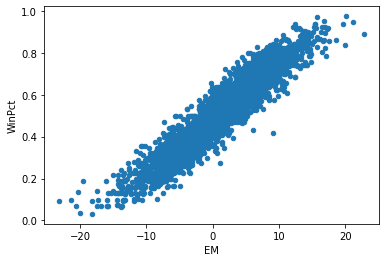

In [101]:
bbpts['EM']=bbpts['TmPts']-bbpts['OppPts']
bbpts.plot.scatter(x='EM',y='WinPct')

In [102]:
mod = ols(formula='WinPct ~ EM', data=bbpts)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 WinPct   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 2.515e+04
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        10:52:01   Log-Likelihood:                 4860.1
No. Observations:                3495   AIC:                            -9716.
Df Residuals:                    3493   BIC:                            -9704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4869      0.001    472.585      0.000       0.485       0.489
EM             0.0262      0.000    158.574      0.000       0.026       0.027
==============================================================================
Omnibus:                        6.733   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                7.044
Skew:                          -0.073   Prob(JB):                       0.0295
Kurtosis:                       3.165   Cond. No.                         6.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Draft

In [103]:
# Data from the 1970 and 1971 military drafts (during Vietnam War)
dr70=pd.read_csv('draft70.csv')
dr71=pd.read_csv('draft71.csv')

In [104]:
dr70.head()

,DayOfYear,DraftNum,Month
0,1,305,1
1,2,159,1
2,3,251,1
3,4,215,1
4,5,101,1


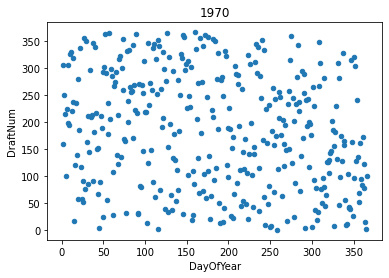

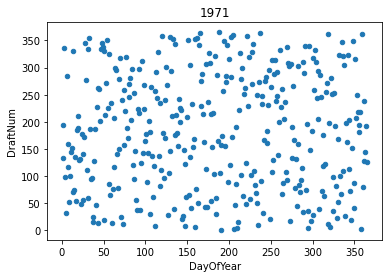

In [109]:
# Based on the scatterplot, despite the year that anyone eligible was drafted, it appears randomized.
dr70.plot.scatter(x='DayOfYear',y='DraftNum',title="1970")
dr71.plot.scatter(x='DayOfYear',y='DraftNum',title="1971")

In [105]:
# Appeared to be some conception about being born later in the year and getting a lower draft number
# Lower draft number meant less likely to get drafted, but may have not been the case at all, randomized. 
mod = ols(formula='DraftNum ~ DayOfYear', data=dr70)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DraftNum   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     19.54
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.31e-05
Time:                        10:58:13   Log-Likelihood:                -2215.4
No. Observations:                 366   AIC:                             4435.
Df Residuals:                     364   BIC:                             4443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    224.9134     10.812     20.802      0.000     203.652     246.175
DayOfYear     -0.2257      0.051     -4.420      0.000      -0.326      -0.125
==============================================================================
Omnibus:                      118.820   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.604
Skew:                          -0.025   Prob(JB):                     9.13e-05
Kurtosis:                       1.897   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

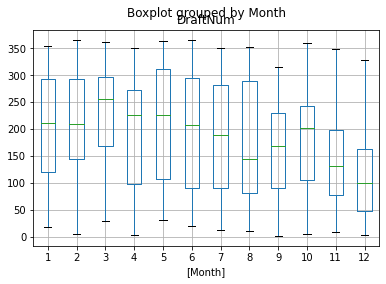

In [113]:
dr70[['DraftNum','Month']].boxplot(by='Month')

In [115]:
dr70.head()

,DayOfYear,DraftNum,Month
0,1,305,1
1,2,159,1
2,3,251,1
3,4,215,1
4,5,101,1


In [116]:
dr71.tail()

,DayOfYear,DraftNum,Month
360,361,239,12
361,362,128,12
362,363,145,12
363,364,192,12
364,365,126,12


In [123]:
dr70['Year']=1970
dr71['Year']=1971

In [124]:
drafts=pd.concat([dr70,dr71])

In [125]:
drafts.head()

,DayOfYear,DraftNum,Month,Year
0,1,305,1,1970
1,2,159,1,1970
2,3,251,1,1970
3,4,215,1,1970
4,5,101,1,1970


In [126]:
drafts.tail()

,DayOfYear,DraftNum,Month,Year
360,361,239,12,1971
361,362,128,12,1971
362,363,145,12,1971
363,364,192,12,1971
364,365,126,12,1971


In [127]:
drafts.reset_index(inplace=True,drop=True)

In [128]:
drafts.tail()

,DayOfYear,DraftNum,Month,Year
726,361,239,12,1971
727,362,128,12,1971
728,363,145,12,1971
729,364,192,12,1971
730,365,126,12,1971


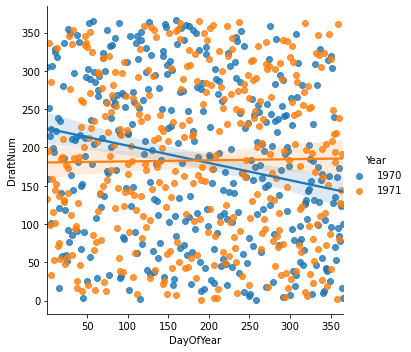

In [131]:
sn.lmplot(x='DayOfYear',y='DraftNum',hue='Year',data=drafts)